<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.optimize import fsolve

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

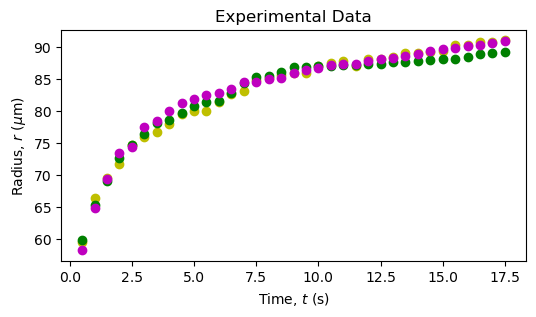

In [11]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()

# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")

# setting axis labels & figures 
plt.xlabel("Time, $t$ (s)")
plt.ylabel("Radius, $r$ ($\mu$m)")
plt.title("Experimental Data")

# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

In [14]:
# Compacting the data in a list for conveniency
radius = np.array([radius_data1, radius_data2, radius_data3])

# Initializing the list that will contain the three sets of speeds, in mcm/s, and the set of contact angles
speeds = [[], [], []]
angles = [[], [], []]


# Calculating the speeds as the average speed between to consecutive measurement of radius
for i in range(3):
    
    for j in range(3):
        
        speeds[i] = [(radius[i][j+1] - radius[i][j]) / 0.5 for j in range(len(radius[i])-1)]



for i in range(3):

    for r in radius[i]:
        
        # Using Cardano's method for depressed cubics to obtain the real root of the equation in H
        p = 3 * r ** 2
        q = - 6 * 1000 * 7.6 / math.pi
        h = (-0.5 * q + (q ** 2 / 4 + p ** 3 / 27) ** (1/2)) ** (1/3) - (+0.5 * q + (q ** 2 / 4 + p ** 3 \
                                                                                     / 27) ** (1/2)) ** (1/3)
        
        # Calculating and storing the contact angle
        theta = 0.5 * math.pi - math.atan((r ** 2 - h ** 2) / (2 * h * r))
        angles[i].append(theta)
        
        

Let's plot these results to see what they look like:

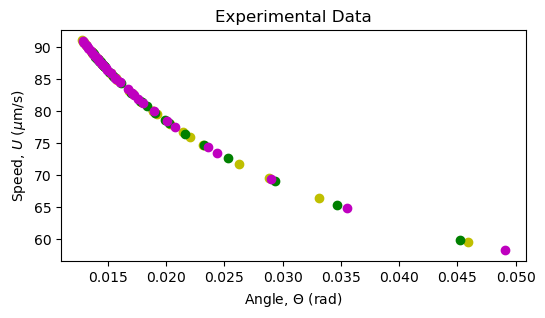

In [13]:
# plotting data from experimental runs 1-3:
plt.plot(angles[0], radius[0], "yo")
plt.plot(angles[1], radius[1], "go")
plt.plot(angles[2], radius[2], "mo")

# setting axis labels & figures 
plt.xlabel("Angle, $\Theta$ (rad)")
plt.ylabel("Speed, $U$ ($\mu$m/s)")
plt.title("Experimental Data")

# displaying the plot
plt.show()

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

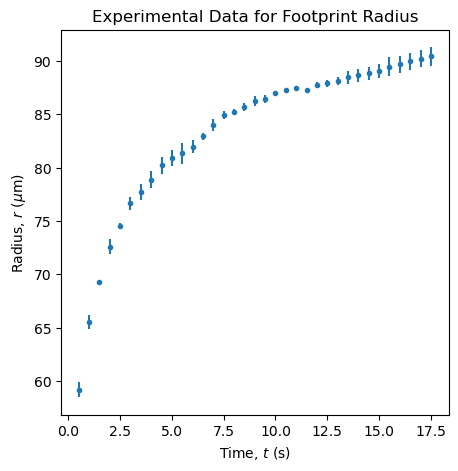

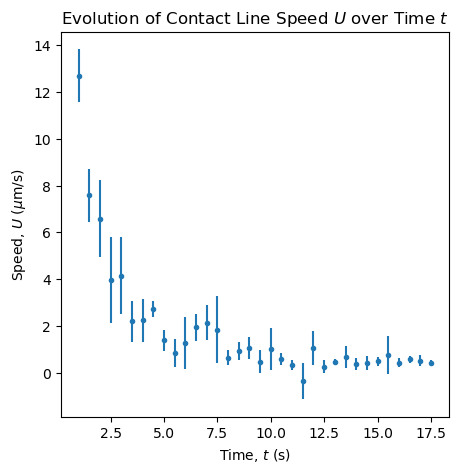

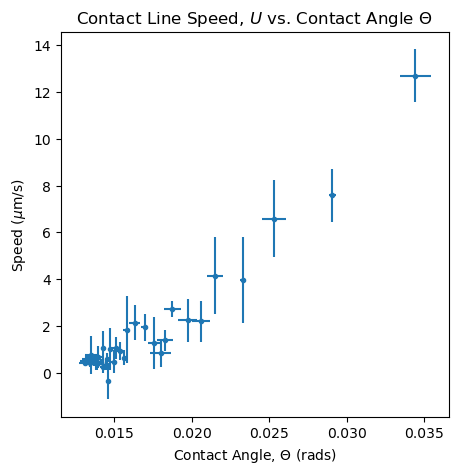

In [15]:
plt.rcParams['figure.figsize'] = (5,5)

# transforming the originally list of lists to an ndarray, to more easily calculate
# the means and standard deviations of the data
radius = np.asarray(radius)

# calculating the mean radius and the standard deviation, which will serve as error
radius_mean = np.mean(radius, axis = 0)
radius_std = np.std(radius, axis = 0)


# plotting the mean radius against time
plt.errorbar(time, radius_mean, yerr=radius_std, fmt='.')
plt.xlabel("Time, $t$ (s)")
plt.ylabel("Radius, $r$ ($\mu$m)")
plt.title("Experimental Data for Footprint Radius")
plt.show()

# repeating the same process for the contact speeds
speeds = np.asarray(speeds)

speeds_mean = np.mean(speeds, axis = 0)

speeds_std = np.std(speeds, axis = 0)

# the first element of the time array must be eliminated in order to match sizes with the array of speeds
# due to the method used to calculate the speed
plt.errorbar(time[1:], speeds_mean, yerr=speeds_std, fmt='.')
plt.xlabel("Time, $t$ (s)")
plt.ylabel("Speed, $U$ ($\mu$m/s)")
plt.title("Evolution of Contact Line Speed $U$ over Time $t$")
plt.show()

# repeating the same process again for the angles calculated earlier
angles = np.asarray(angles)

angles_mean = np.mean(angles, axis = 0)

angles_std = np.std(angles, axis = 0)

# once again, the first element must be eliminated
plt.errorbar(angles_mean[1:], speeds_mean, yerr=speeds_std, xerr=angles_std[1:], fmt='.')
plt.xlabel("Contact Angle, $\Theta$ (rads)")
plt.ylabel("Speed ($\mu$m/s)")
plt.title("Contact Line Speed, $U$ vs. Contact Angle $\Theta$")
plt.show()

![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [20]:
# calculating the fit of the de Gennes law, in the linear form U_fit = A*angle^2+B
angles_squared = np.power(angles_mean, 2)
(coef_dg, covr_dg) = np.polyfit(angles_squared[1:], speeds_mean, 1, cov=True)

dg_fit = np.polyval(coef_dg, angles_squared[1:])

u0_dg_err = np.sqrt(covr_dg[0][0])

# the error is calculated by simple error propagation with only one contributing variable
# err(angle^2) = 2*angle*err_angle (with the angle in radians!!)
angles_squared_err = 2 * np.multiply(angles_mean[1:], angles_std[1:])

# the expected error on data from the assumed fit
sigma_dg_fit = np.sqrt(np.sum(np.power(speeds_mean-dg_fit, 2))/(len(speeds_mean)-2))

# showing the value of the characteristic speed obtained
print('According to the de Gennes law, the value of U_0 is '
      '{:04.3f} +/- {:04.3f} micrometers per second.'.format(coef_dg[0], u0_dg_err))


# repeating the same process for the Cox-Voinov law, this time with the linear fit U_fit = C*angle^3+D
angles_cubed = np.power(angles_mean, 3)
(coef_cv, covr_cv) = np.polyfit(angles_cubed[1:], speeds_mean, 1, cov=True)

cv_fit = np.polyval(coef_cv, angles_cubed[1:])

u0_cv_err = np.sqrt(covr_cv[0][0])

# by error propagation(in radians), err(angle^3) = 3*angle^2*err_angle
angles_cubed_err = 3 * np.multiply(angles_squared[1:], angles_std[1:])

# the expected error on data from the assumed fit
sigma_cv_fit = np.sqrt(np.sum(np.power(speeds_mean-cv_fit, 2))/(len(speeds_mean)-2))

# showing the value of the characteristic speed for the Cox-Voinov fit
print('According to the Cox-Voinov law, the value of U_0 is '
      '{:04.3f} +/- {:04.3f} micrometers per second.'.format(coef_cv[0], u0_cv_err))



# moving on to the fits to obtain the value of the equilibrium contact angle
# starting with the de Gennes law
angles_2_u0 = coef_dg[0] * angles_squared

(coef_dg_u0, covr_dg_u0) = np.polyfit(angles_2_u0[1:], speeds_mean, 1, cov=True)

dg_u0_fit = np.polyval(coef_dg_u0, angles_2_u0[1:])

angle_dg_fit = np.sqrt(-coef_dg_u0[1] / coef_dg[0]) 

# the derivative method for calculating the error is not viable since the variables cannot be assumed to be independent
# the error is estimated through the squared sum of relative errors
err_angle_dg_fit = angle_dg_fit * np.sqrt(covr_dg[0][0] / (coef_dg[0] ** 2) + covr_dg_u0[1][1] / (coef_dg_u0[1] ** 2))

# leaving a blank line for clarity and showing the result
print('')
print('According to the de Gennes law, the value of the contact angle at equilibrium is '
     '{:04.4f} +/- {:04.4f} radians.'.format(angle_dg_fit, err_angle_dg_fit))


# repeating the process for Cox-Voinov law
angles_3_u0 = coef_cv[0] * angles_cubed

(coef_cv_u0, covr_cv_u0) = np.polyfit(angles_3_u0[1:], speeds_mean, 1, cov=True)

cv_u0_fit = np.polyval(coef_cv_u0, angles_3_u0[1:])

angle_cv_fit = (-coef_cv_u0[1] / coef_cv[0]) ** (1/3)

err_angle_cv_fit = angle_cv_fit * np.sqrt(covr_cv[0][0] / (coef_cv[0] ** 2) + covr_cv_u0[1][1] / (coef_cv_u0[1] ** 2))


print('According to the Cox-Voinov law, the value of the contact angle at equilibrium is '
      '{:04.3f} +/- {:04.3f} radians'.format(angle_cv_fit, err_angle_cv_fit))




According to the de Gennes law, the value of U_0 is 11851.218 +/- 438.628 micrometers per second.
According to the Cox-Voinov law, the value of U_0 is 330611.807 +/- 12601.034 micrometers per second.

According to the de Gennes law, the value of the contact angle at equilibrium is 0.0126 +/- 0.0012 radians.
According to the Cox-Voinov law, the value of the contact angle at equilibrium is 0.009 +/- 0.004 radians


Displaying the corresponding fits  

(0.0, 5e-05, 0.0, 15.0)

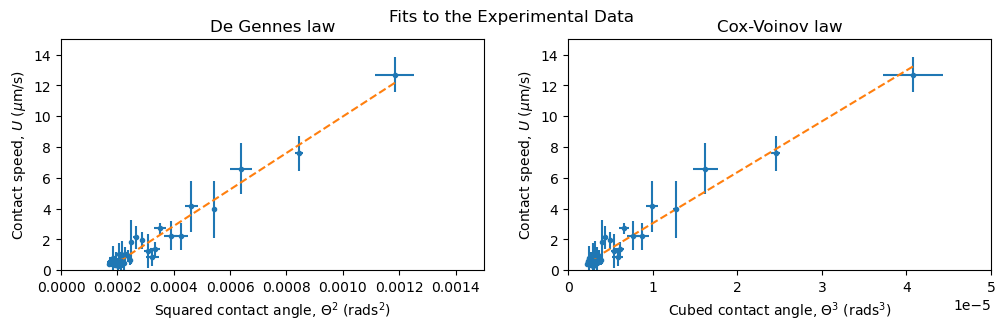

In [8]:
plt.rcParams['figure.figsize'] = (12,3)

# plotting figures side by side
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Fits to the Experimental Data')

# starting the the fit of de Gennes law
ax1.errorbar(angles_squared[1:], speeds_mean, yerr=speeds_std, xerr=angles_squared_err, fmt='.')
ax1.plot(angles_squared[1:], dg_fit, '--')
ax1.set(xlabel = 'Squared contact angle, $\Theta^2$ (rads$^2$)')
ax1.set(ylabel = 'Contact speed, $U$ ($\mu$m/s)')
ax1.set_title('De Gennes law')
# setting upper and lower limits on the axis for clarity
ax1.axis([0, 0.0015, 0, 15])

# now plotting the fit of Cox-Voinov law
ax2.errorbar(angles_cubed[1:], speeds_mean, yerr=speeds_std, xerr=angles_cubed_err, fmt='.')
ax2.plot(angles_cubed[1:], cv_fit, '--')
ax2.set(xlabel = 'Cubed contact angle, $\Theta^3$ (rads$^3$)')
ax2.set(ylabel = 'Contact speed, $U$ ($\mu$m/s)')
ax2.set_title('Cox-Voinov law')
ax2.axis([0, 0.00005, 0, 15])

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

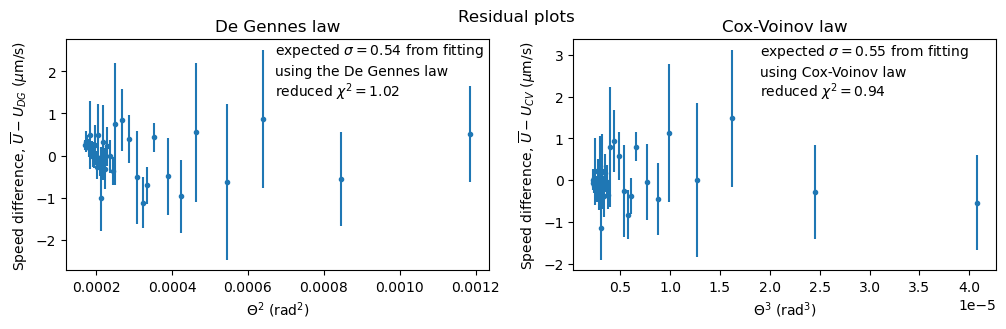

In [9]:
# write your code here & but also expand the description above

def cal_Chi_sqrt(speeds, sigma_speeds, speeds_fit, n):
    return sum(((speeds - speeds_fit) / sigma_speeds) ** 2) / (np.size(speeds)-(n+1))

# for the de Gennes fit
chi2_dg = cal_Chi_sqrt(speeds_mean, speeds_std, dg_fit, 1)

# for the Cox-Voinov fit
chi2_cv = cal_Chi_sqrt(speeds_mean, speeds_std, cv_fit, 1)

# plotting the residual plots
fig,(ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Residual plots')

# residual plot of the de Gennes law fit
ax1.errorbar(angles_squared[1:], speeds_mean-dg_fit, yerr=speeds_std, fmt='.')
ax1.set(xlabel = '$\Theta^2$ (rad$^2$)')
ax1.set(ylabel = 'Speed difference, $\overline{U}-U_{DG}$ ($\mu$m/s)')
ax1.set_title('De Gennes law')
ax1.text(0.00067, 2.4, 'expected $\sigma = {:4.2f}$ from fitting'.format(sigma_dg_fit))
ax1.text(0.00067, 1.9, 'using the De Gennes law')
ax1.text(0.00067, 1.4, 'reduced $\chi^2 = {:4.2f}$'.format(chi2_dg))

# now, for the Cox-Voinov law fit
ax2.errorbar(angles_cubed[1:], speeds_mean-cv_fit, yerr=speeds_std, fmt='.')
ax2.set(xlabel = '$\Theta^3$ (rad$^3$)')
ax2.set(ylabel = 'Speed difference, $\overline{U}-U_{CV}$ ($\mu$m/s)')
ax2.set_title('Cox-Voinov law')
ax2.text(1.9e-5, 3, 'expected $\sigma = {:4.2f}$ from fitting'.format(sigma_cv_fit))
ax2.text(1.9e-5, 2.5, 'using Cox-Voinov law')
ax2.text(1.9e-5, 2, 'reduced $\chi^2 = {:4.2f}$'.format(chi2_cv))

plt.show()


![](./img/bee.png)
## Drop Spreading Law Is

The results of the $\chi^2$ analysis suggest that the de Gennes law is a better fit for the behaviour of the spreading drop because, as seen on the figures of the residual plots shown earlier, its value of reduced $\chi^2$ is much lower than in the case of the fit for the Cox-Voinov law. Given the values of the characteristic contact speed and the contact angle at equilibrium obtained from the fit, we can compare our experimental measurements with a simulation of the de Gennes drop spreading law. Furthermore, now that we have established which law fits the experimental data better, we can also state the values for both the characteristic speed of the drop and the contact angle at equilibrium:

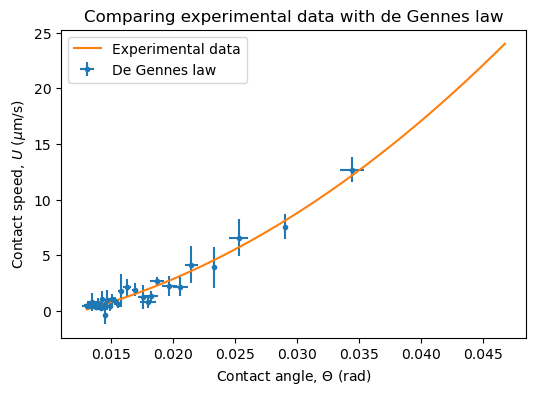

The value of the characteristic speed of the drop obtained is 1.19 +/- 0.04 centimeters per second.
Meanwhile, the value of the contact angle at equilibrium is 0.0126 +/- 0.0012 radians.


In [10]:
plt.rcParams['figure.figsize'] = (6,4)

# generating the values for the simulated de Gennes law
angle_sim = np.linspace(min(angles_mean), max(angles_mean), 300)
speed_sim = coef_dg[0]*(np.power(angle_sim, 2) - angle_dg_fit ** 2) 

# plotting both sets of data, experimental and simulated, over the same set of axis
plt.errorbar(angles_mean[1:], speeds_mean, yerr=speeds_std, xerr=angles_std[1:], fmt='.')
plt.plot(angle_sim, speed_sim)
plt.xlabel("Contact angle, $\Theta$ (rad)")
plt.ylabel("Contact speed, $U$ ($\mu$m/s)")
plt.title("Comparing experimental data with de Gennes law")
# creating a legend on the figure
plt.legend(['Experimental data', 'De Gennes law'])
plt.show()

print('The value of the characteristic speed of the drop obtained is '
      '{:04.2f} +/- {:.2f} centimeters per second.'.format(coef_dg[0]*1e-4, u0_dg_err*1e-4))
print('Meanwhile, the value of the contact angle at equilibrium is '
     '{:04.4f} +/- {:04.4f} radians.'.format(angle_dg_fit, err_angle_dg_fit))

This plot is nothing but another form of the linear fit already carried before. Nonetheless, through this figure it is quite easy to observe de quadratic behaviour of the contact speed of the spreading drop with the contact angle, as predicted by the de Gennes law. 

It should also be mentioned that the $\chi^2$ test also indicates that the Cox-Voinov law is in fact also a good fit for the experimental data considered, although not as good as the de Gennes law as its reduced $\chi^2$ is further from 1. When looking at the plots produced, one can notice that most of the points concentrate toward smaller values. It is in this region in which the behaviour of quadratic and cubic functions, and thus the de Gennes and the Cox-Voinov laws, differ the least. A study of the behaviours at higher contact angles, where the two laws' evolutions start to differentiate majorly, would help in clarifying which model would fit the general behaviour best. 

![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 